In [ ]:
import numpy as np

The purpose of this notebook is to fit the commute distance distribution of Mumbai to a kernel of the form

$$
f(d) = \frac{1}{1 + (d/a)^b}.
$$

What this means that we wish to find parameters $a$ and $b$ such that $f(d)$ is a close approximation to the fraction of the population in Mumbai **which travels distance $d$ or more**.

We will use data from Figure 3 (reproduced below) from the World bank [study](http://documents.worldbank.org/curated/en/891271468258270484/pdf/wps3693.pdf) titled *Urban Poverty and Transport:  The Case of Mumbai*, by Baker et al. (Identifier: WPS3693).

**Note that we are using "fraction of households" as a proxy for "fraction of individuals".**

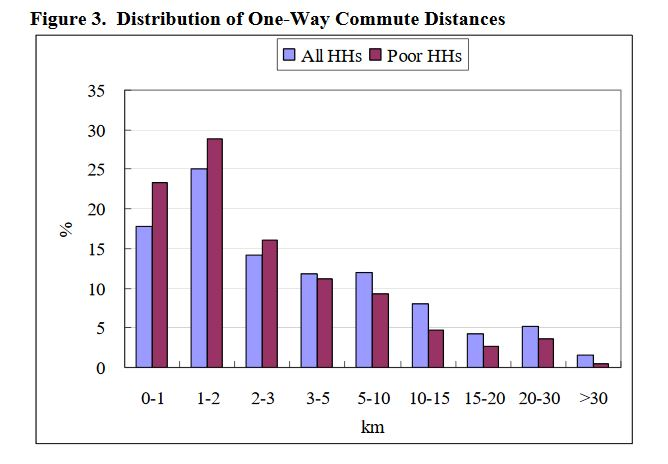

Since we are interested in fitting the complement of the cdf, we assign each bin in the histogram to its lower end-point.  This gives us the following list.

In [ ]:
dvals = np.array([0.0, 1.0, 2.0, 3.0, 5.0, 10.0, 15.0, 20.0, 30.0])

Next, we readoff, approximately, the fraction of the populations in each of the bins.

In [ ]:
binvals = 0.01*np.array([17.5, 25, 14.0, 12.0, 12.0, 8.0, 4.0, 5.5, 2.0])

We check that `binvals` sums up to 1.

In [ ]:
np.sum(binvals)

We now compute a cumulative version of `binvals`, whose $i$th element is the total fraction commuting at least `dvals[i]`.

In [ ]:
cumulative_binvals = np.flip(np.cumsum(np.flip(binvals)))
cumulative_binvals

We can now start the fitting process.  We use the [non-linear least squares implmentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) in `scipy.optimize`.

In [ ]:
from scipy.optimize import curve_fit
# The function to be fit
def f(d, a, b):
    return 1.0/(1.0 + (d/a)**b)

fit_data = curve_fit(f, dvals, cumulative_binvals)
params = fit_data[0]
params_error = np.sqrt(np.diag(fit_data[1]))
params, params_error

Let us now plot the fitted curve and the actual values.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dvals, cumulative_binvals, label="actual")
drange = np.linspace(np.min(dvals), np.max(dvals), num = 100)
fvals = f(drange, *params)
bangkok_vals = f(drange, 4.0, 3.8)
blr_vals = f(drange, 10.751, 5.384)
plt.plot(drange, fvals, label="fitted")
plt.plot(drange, bangkok_vals, label="Bangkok values")
plt.plot(drange, blr_vals, label="Bengaluru values")
plt.legend();
plt.savefig("mumbai_f_kernel.png")

The parameter $(a, b)$ computed from this are therefore given by:

In [ ]:
print(f"[a, b] = {params}.")

The parameters are therefore

$$
[a, b] = [2.70908427, 1.27867369].
$$